Гомография

In [1]:
from matplotlib import pyplot as plt

In [21]:
import cv2
import numpy as np
import random

cat_img = cv2.imread("./data/puss-in-boots.jpg")[:,:,::-1]
board_img = cv2.imread("./data/times-square.jpg")[:,:,::-1]

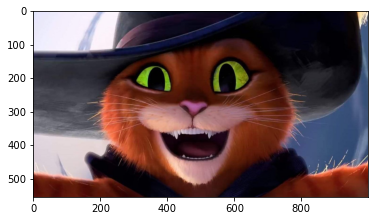

In [24]:
plt.imshow(cat_img)

In [23]:
cat_img[np.all(cat_img == (0, 0, 0), axis=-1)] = (10,10,10)

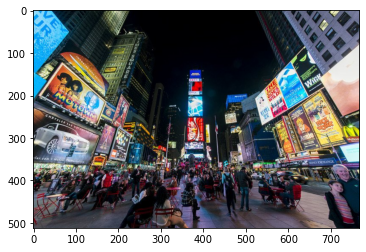

In [5]:
# Поместим кота в сапогах вместо motown (слева)
plt.imshow(board_img)

In [6]:
cat_img.shape

(555, 1000, 3)

In [7]:
# Точки на изображении кота
pts_src = np.array( [ [0,554], [0,0], [999, 0], [999, 554] ] )

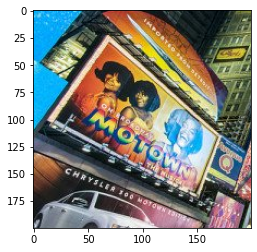

In [8]:
plt.imshow(board_img[100:300,0:200,:])

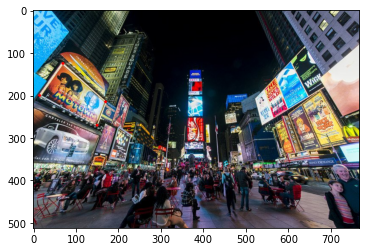

In [9]:
board_img2 = board_img.copy()
# точки на биллборде
pts_dst = np.array( [ [15,200], [70,125], [170,215], [150,270] ] )
cv2.circle(board_img2, pts_dst[0], 2, (255,0,0), 2)
cv2.circle(board_img2, pts_dst[1], 2, (255,0,0), 2)
cv2.circle(board_img2, pts_dst[2], 2, (255,0,0), 2)
cv2.circle(board_img2, pts_dst[3], 2, (255,0,0), 2)
plt.imshow(board_img2) 

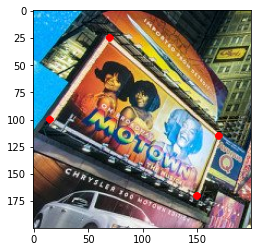

In [10]:
#Выделяем биллборд
plt.imshow(board_img2[100:300,0:200,:])

In [11]:
h, status = cv2.findHomography(pts_src, pts_dst)

In [12]:
status

array([[1],
       [1],
       [1],
       [1]], dtype=uint8)

In [41]:
def combine(img1, img2, h, size):
    img = np.zeros(size,dtype=np.uint8)
    img.fill(255)
    img = cv2.warpPerspective(img1, np.identity(3), size, img, borderMode=cv2.BORDER_TRANSPARENT)
    img = cv2.warpPerspective(img2, h, size, img, borderMode=cv2.BORDER_TRANSPARENT)
    return img

In [42]:
result = combine(board_img, cat_img, h, (board_img.shape[1],board_img.shape[0]))

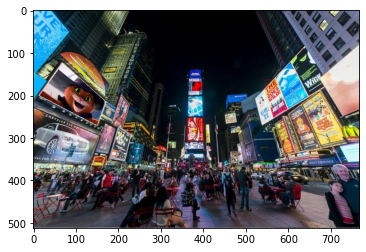

In [44]:
plt.imshow(result)

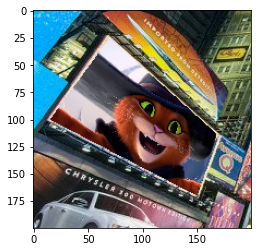

In [45]:
plt.imshow(result[100:300,0:200,:])